# Exploring the bitcoin prices dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset 1

In [2]:
df_kraken=pd.read_csv('../data/bitcoin/BCHARTS-KRAKENUSD.csv')

In [3]:
print('Head\n------')
print(df_kraken.head())
print('\n\n')
print('Tail\n------')
print(df_kraken.tail())
print('\n\n')
print('description\n------')
print(df_kraken.describe())

Head
------
         Date    Open    High     Low   Close  Volume (BTC)  \
0  2017-10-19  5590.0  5731.3  5534.0  5718.5   3373.595949   
1  2017-10-18  5606.5  5630.0  5132.3  5579.4   6192.789612   
2  2017-10-17  5738.7  5759.9  5535.1  5606.5   3462.553479   
3  2017-10-16  5673.2  5776.6  5550.0  5738.8   3134.620657   
4  2017-10-15  5800.0  5840.4  5462.1  5680.0   4536.386215   

   Volume (Currency)  Weighted Price  
0       1.904390e+07     5644.986188  
1       3.340670e+07     5394.451775  
2       1.947659e+07     5624.919714  
3       1.778638e+07     5674.172630  
4       2.545265e+07     5610.777658  



Tail
------
            Date       Open       High        Low      Close  Volume (BTC)  \
1377  2014-01-11  858.20000  918.05471  857.16554  899.84105     18.748285   
1378  2014-01-10  839.99000  857.34056  817.00000  857.33056      8.024510   
1379  2014-01-09  825.56345  870.00000  807.42084  841.86934      8.158335   
1380  2014-01-08  810.00000  899.84281  788.0000

In [4]:
# Add a column for variance
df_kraken['Day-Variation'] = (df_kraken['Open'] - df_kraken['Close'])/df_kraken['Close']
print(df_kraken.head(2))

         Date    Open    High     Low   Close  Volume (BTC)  \
0  2017-10-19  5590.0  5731.3  5534.0  5718.5   3373.595949   
1  2017-10-18  5606.5  5630.0  5132.3  5579.4   6192.789612   

   Volume (Currency)  Weighted Price  Day-Variation  
0       1.904390e+07     5644.986188      -0.022471  
1       3.340670e+07     5394.451775       0.004857  


In [5]:
df_kraken['Date']=pd.to_datetime(df_kraken['Date'])

In [6]:
df_kraken.index = df_kraken['Date']
df_kraken.drop(columns=['Date'],inplace=True)

In [7]:
print(df_kraken.head(2))

              Open    High     Low   Close  Volume (BTC)  Volume (Currency)  \
Date                                                                          
2017-10-19  5590.0  5731.3  5534.0  5718.5   3373.595949       1.904390e+07   
2017-10-18  5606.5  5630.0  5132.3  5579.4   6192.789612       3.340670e+07   

            Weighted Price  Day-Variation  
Date                                       
2017-10-19     5644.986188      -0.022471  
2017-10-18     5394.451775       0.004857  


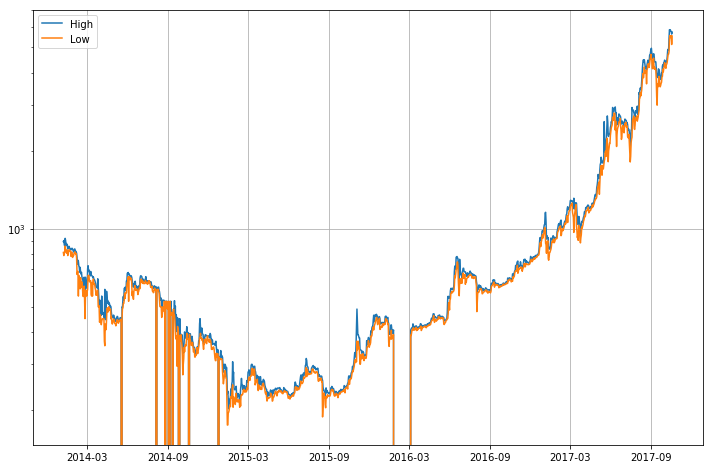

In [8]:
f=plt.figure(figsize=(12,8))
plt.plot(df_kraken.index,df_kraken['High'],label='High')
plt.plot(df_kraken.index,df_kraken['Low'],label='Low')
plt.grid()
plt.legend()
f.axes[0].set_yscale('log')


## Removing missing points

## Dataset 2 (Kaggle - HackerNews)

In [9]:
df_HN=pd.read_csv('../data/bitcoin/HackerNews_bitcoin_price.csv')
print('Head\n------')
print(df_HN.head())
print('\n\n')
print('Tail\n------')
print(df_HN.tail())
print('\n\n')
print('description\n------')
print(df_HN.describe())

Head
------
             date  price
0   1/5/2009 0:00    0.0
1   1/7/2009 0:00    0.0
2   1/9/2009 0:00    0.0
3  1/11/2009 0:00    0.0
4  1/13/2009 0:00    0.0



Tail
------
                date         price
1669  2/25/2018 0:00   9696.593333
1670  2/27/2018 0:00  10763.883330
1671   3/1/2018 0:00  11009.381670
1672   3/3/2018 0:00  11326.948330
1673   3/5/2018 0:00  11595.540000



description
------
              price
count   1674.000000
mean     826.226482
std     2351.869070
min        0.000000
25%        1.285675
50%      122.835005
75%      568.750000
max    19289.785000


In [10]:
df_HN['date']=pd.to_datetime(df_HN['date'])
df_HN.index = df_HN['date']
df_HN.drop(columns=['date'],inplace=True)

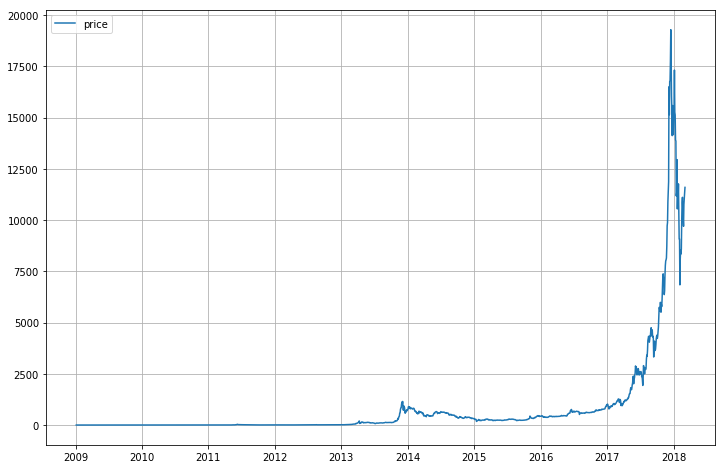

In [12]:
f2=plt.figure(figsize=(12,8))
plt.plot(df_HN.index,df_HN['price'],label='price')
plt.grid()
plt.legend()
#f2.axes[0].set_yscale('log')
